data = pd.read_csv('../00_Data/electronic_sales_prepared.csv')

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [66]:
# 1. Baca data
df = pd.read_csv("../00_Data/vgsales.csv")

In [ ]:
scaler = StandardScaler()
sales_data = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
sales_data = df_log = np.log1p(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])
scaled_data = scaler.fit_transform(sales_data)

Clustering dengan K-Means

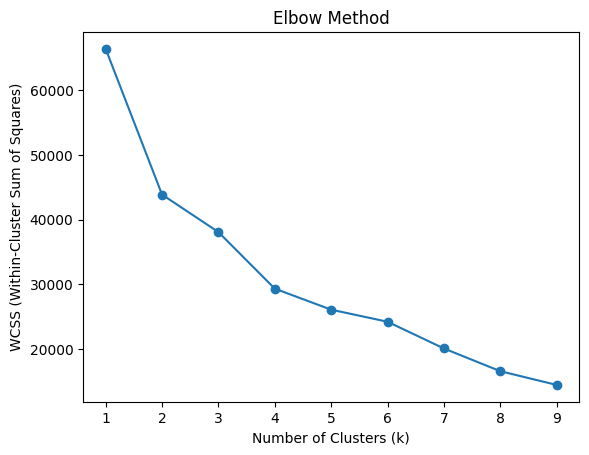

In [68]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['Cluster'] = clusters

In [70]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.8298596884046303


In [71]:
cluster_summary = df.groupby('Cluster')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()
print(cluster_summary)

          NA_Sales   EU_Sales  JP_Sales  Other_Sales
Cluster                                             
0         0.171387   0.083755  0.050551     0.027191
1         9.189787   5.344681  2.858298     1.833404
2        41.490000  29.020000  3.770000     8.460000
3         1.877039   1.292835  0.548646     0.425795


In [73]:
df[df['Cluster'] == 2]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Cluster
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2


Clustering dengan DBSCAN

Evaluasi DBSCAN